# Trabajo practico IAA

### Descripcion general
En este trabajo, vamos a predecir la cantidad de anillos en la concha de la oreja de mar, que corresponde a la edad del abulón. Tradicionalmente, la edad se determina cortando la concha, tiñéndola y contando los anillos bajo un microscopio, un proceso tedioso y largo. En lugar de esto, utilizaremos mediciones físicas más accesibles, como la longitud, diámetro, altura y varios pesos del abulón, para predecir el número de anillos. Este número es la variable objetivo en nuestro modelo, y puede ser abordado tanto como un valor continuo como en un problema de clasificación. Cada atributo del dataset se describe con su tipo de dato, unidad de medida y una breve descripción, facilitando así un análisis y modelado predictivo más eficiente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Analisis Introductorio

Vemos las primeras 5 filas

In [2]:
df = pd.read_csv("C:/Users/M/Desktop/ia/tp/abalone.csv")
df.head(5)

,Sexo,Longitud,Diametro,Altura,Peso entero,Peso sin concha,Peso de las visceras,Peso de la concha,Anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Se agrego nombre a cada columna segun  la  informacion  sacada en **abalone.names**


In [3]:
df.shape

(4177, 9)

Contiene 4177 filas y 9 columnas. Se utilizara el "Sexo" como target para poder predecir la edad de los anillos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  4177 non-null   object 
 1   Longitud              4177 non-null   float64
 2   Diametro              4177 non-null   float64
 3   Altura                4177 non-null   float64
 4   Peso entero           4177 non-null   float64
 5   Peso sin concha       4177 non-null   float64
 6   Peso de las visceras  4177 non-null   float64
 7   Peso de la concha     4177 non-null   float64
 8   Anillos               4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


El dataset no contiene valores unicos y contiene dtypes: float64(7), int64(1), object(1)

In [11]:
df.columns

Index(['Sexo', 'Longitud', 'Diametro', 'Altura', 'Peso entero',
       'Peso sin concha', 'Peso de las visceras', 'Peso de la concha',
       'Anillos'],
      dtype='object')

In [5]:
df.describe()

,Longitud,Diametro,Altura,Peso entero,Peso sin concha,Peso de las visceras,Peso de la concha,Anillos
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Descripción de los atributos:

- **Sexo (Sex)**: Variable nominal con tres posibles valores: M (macho), F (hembra) e I (infante). Esta variable indica el sexo del abalone.
- **Longitud (Length)**: Variable continua que mide la longitud del caparazón del abalone en milímetros.
- **Diámetro (Diameter)**: Variable continua que mide el diámetro, perpendicular a la longitud, también en milímetros.
- **Altura (Height)**: Variable continua que mide la altura del caparazón del abalone con la carne aún dentro, en milímetros.
- **Peso entero (Whole weight)**: Variable continua que mide el peso total del abalone en gramos.
- **Peso sin concha (Shucked weight)**: Variable continua que mide el peso de la carne del abalone en gramos, una vez que se ha quitado la concha.
- **Peso de las vísceras (Viscera weight)**: Variable continua que mide el peso del intestino después de haber sido drenado de sangre, en gramos.
- **Peso de la concha (Shell weight)**: Variable continua que mide el peso de la concha seca después de haber sido removida del abalone, en gramos.
- **Anillos (Rings)**: Variable entera, que indica el número de anillos en el caparazón del abalone. Este es el valor objetivo en el problema, y se suma 1.5 a los anillos para obtener la edad aproximada del abalone en años.


In [6]:
df.isnull().sum()

Sexo                    0
Longitud                0
Diametro                0
Altura                  0
Peso entero             0
Peso sin concha         0
Peso de las visceras    0
Peso de la concha       0
Anillos                 0
dtype: int64

El dataset no contiene valores faltantes


C:\Users\mabel\AppData\Local\Temp\ipykernel_12012\4067872636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sexo', palette='Set1')


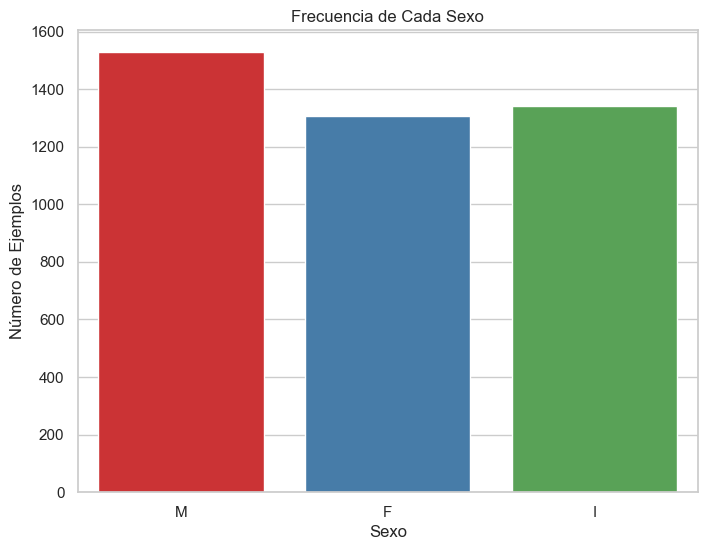

In [27]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de conteo para la columna 'Sexo'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sexo', palette='Set1')
plt.title('Frecuencia de Cada Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Ejemplos')
plt.show()

M (Maculino), F (Femenino), and I (infante)

In [4]:
# Obtener la frecuencia de cada categoría en la columna 'Sexo'
frequencies = df['Sexo'].value_counts()
print(frequencies)

Sexo
M    1528
I    1342
F    1307
Name: count, dtype: int64


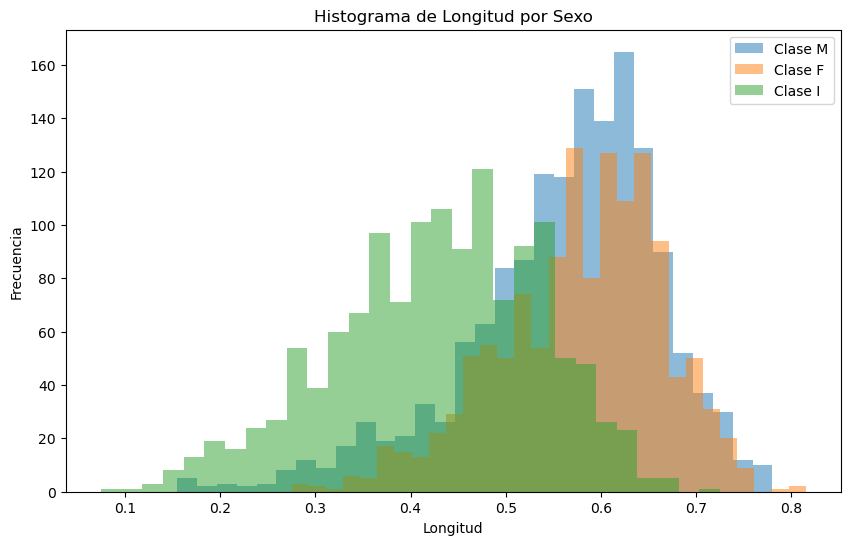

In [5]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Longitud'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')



# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

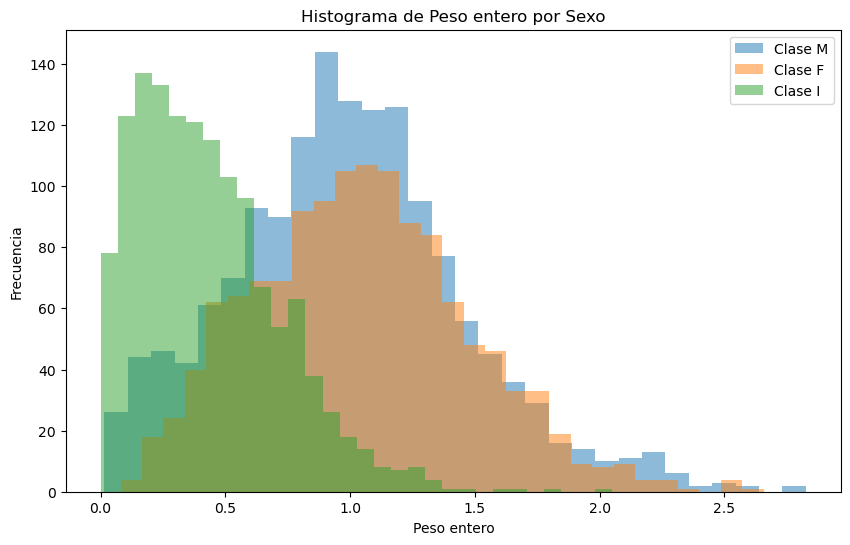

In [6]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Peso entero'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')


# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

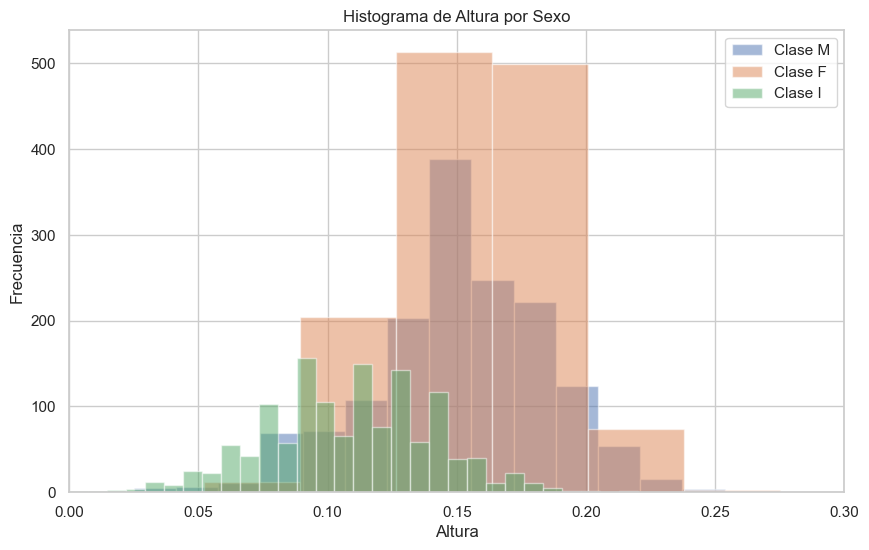

In [35]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Altura'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

In [4]:
#usando  sexo como target
clases = df['Sexo'].unique()
clases

array(['M', 'F', 'I'], dtype=object)

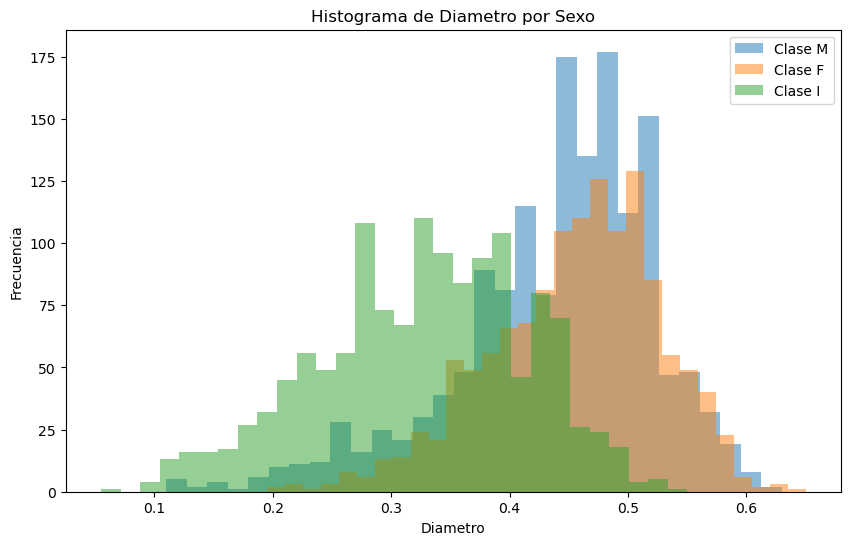

In [5]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Diametro'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
#ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

El  histograma de diametro es similar al de longitud y es **en el que mejor se puede observar una separacion de clases**

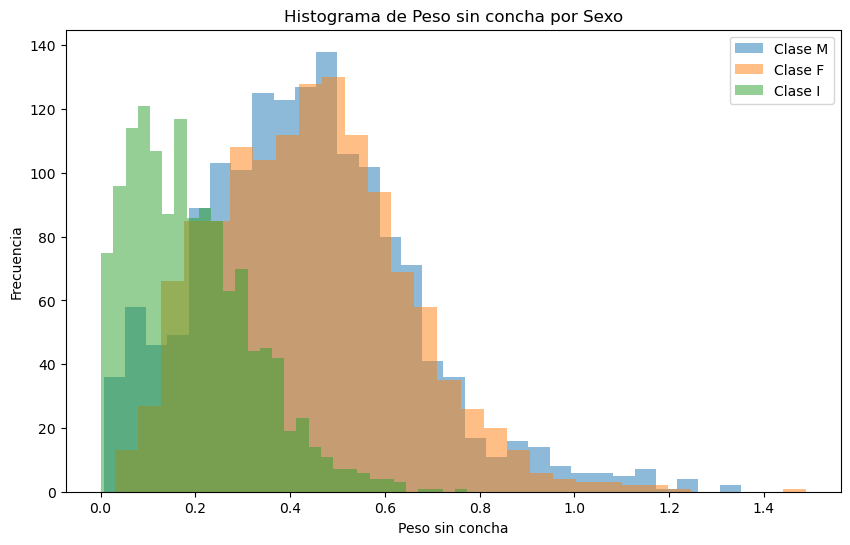

In [13]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Peso sin concha'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
#ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

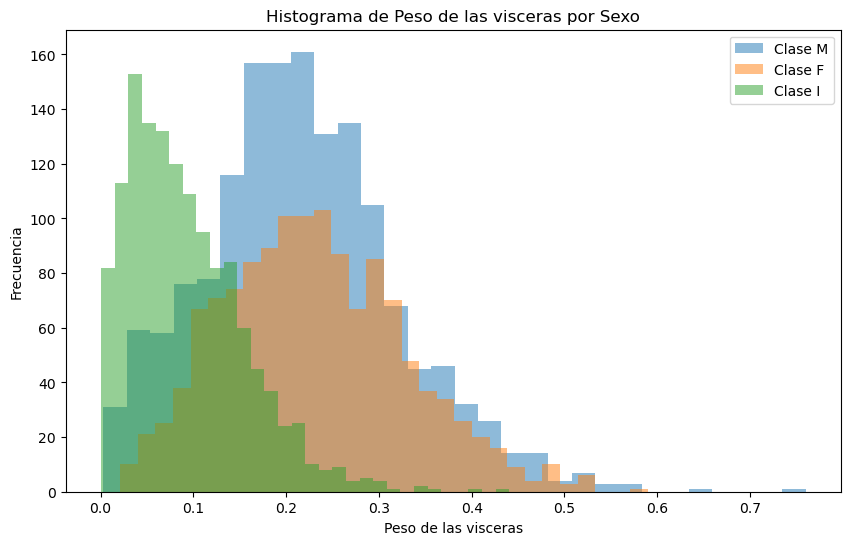

In [15]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Peso de las visceras'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
#ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

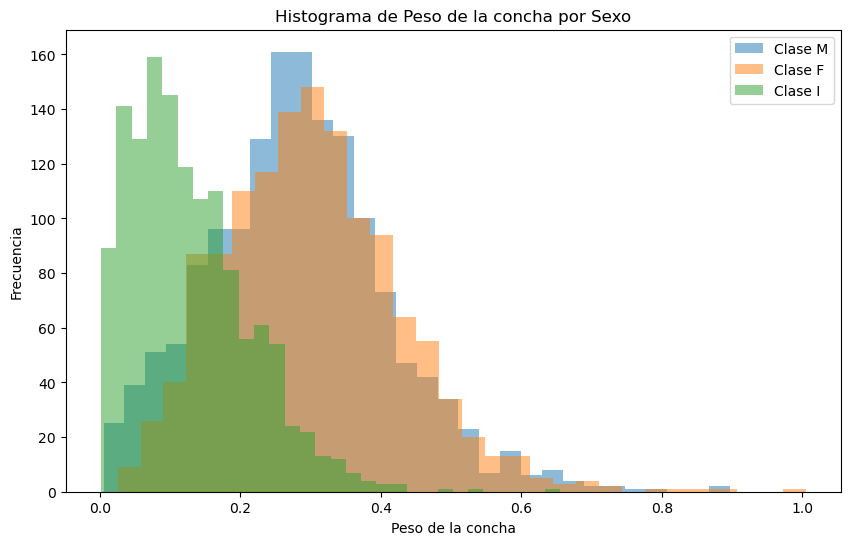

In [16]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Peso de la concha'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
#ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

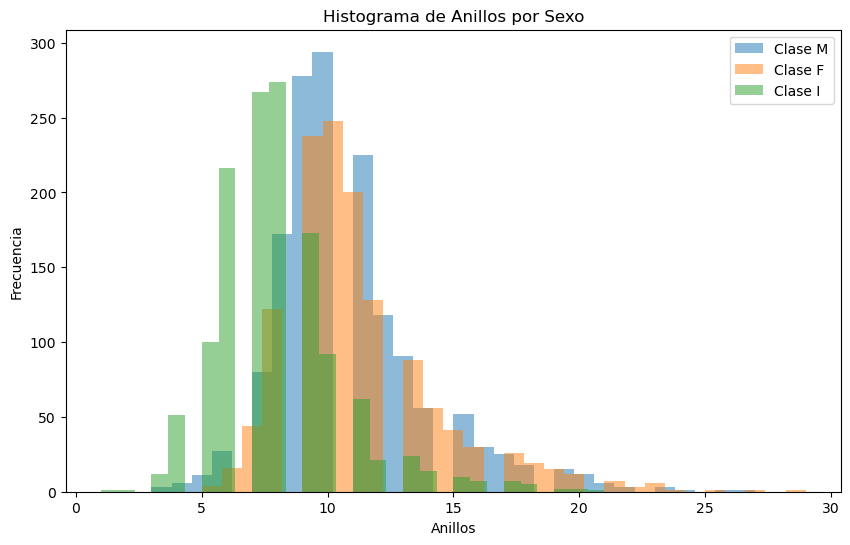

In [17]:
# Establecer la columna de objetivo
target = 'Sexo'
# Establecer la columna de datos continua para el histograma
data_column = 'Anillos'

# Crear un histograma para cada clase
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener las clases únicas en la columna 'Sexo'
clases = df[target].unique()

for clase in clases:
    subset = df[df[target] == clase]
    ax.hist(subset[data_column], bins=30, alpha=0.5, label=f'Clase {clase}')

# Ajustar los límites del eje X
#ax.set_xlim(0.0, 0.3)

# Configurar el título y las etiquetas
ax.set_title(f'Histograma de {data_column} por {target}')
ax.set_xlabel(data_column)
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

## Clasificacion en rangos

In [4]:
# Crear las categorías de edad a partir del número de anillos
# Añadimos 1.5 a los anillos para convertirlos en edad, luego categorizamos
df['Edad'] = df['Anillos'] + 1.5 #linea 79 abalone.names
df['Categoria'] = pd.cut(df['Edad'], bins=[0, 8.5, 10.5, float('inf')],
                         labels=['Joven', 'Adulto', 'Viejo'])

# Eliminar la columna de anillos y edad ya que no las necesitamos más
df = df.drop(columns=['Anillos', 'Edad'])

el numero de anillos + 1.5 es igual a la edad en años.

- **0 a 8.5 años**: Se considera la categoría "Joven".
- **8.5 a 10.5 años**: Se considera la categoría "Adulto".
- **10.5 años en adelante**: Se considera la categoría "Viejo".

In [5]:
# Dividir en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Categoria'])  # Atributos
y = df['Categoria']  # Clase a predecir

In [6]:
# Convertir las variables categóricas como el sexo en variables dummy (One-Hot Encoding)
X = pd.get_dummies(X, columns=['Sexo'])

**One-Hot Encoding** se utiliza para convertir variables categóricas en datos numéricos porque los modelos de machine learning requieren datos en formato numérico para funcionar. Esta técnica transforma cada categoría de una variable en una columna binaria separada, evitando interpretaciones erróneas sobre el orden o la relación entre categorías. Esto asegura que el modelo pueda procesar y aprender de la información categórica de manera efectiva.

**porque** esto se hace para que estas variables categoricas como el sexo se adapten a las variables numericas que tienen los datos

Una **variable dummy** es una columna que tiene un valor de 0 o 1 y representa la presencia o ausencia de una categoría particular. Para cada valor posible de la variable categórica original, se crea una nueva columna.


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Entrenar un modelo de clasificación (puedes usar Random Forest como ejemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = clf.predict(X_test)

In [9]:
y_pred

array(['Viejo', 'Adulto', 'Viejo', ..., 'Adulto', 'Viejo', 'Viejo'],
      dtype=object)

In [31]:
# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adulto       0.55      0.50      0.52       376
       Joven       0.80      0.75      0.77       273
       Viejo       0.75      0.82      0.78       605

    accuracy                           0.71      1254
   macro avg       0.70      0.69      0.69      1254
weighted avg       0.70      0.71      0.70      1254



### Informe de Clasificación - Interpretación Resumida

#### Métricas clave:
- **Precision**: Mide la exactitud de las predicciones correctas de una clase. Ej: El modelo tiene una precisión del **55%** para la clase "Adulto", es decir, el 55% de las veces que predice "Adulto", acierta.
- **Recall**: Mide cuántos de los ejemplos reales de una clase fueron correctamente clasificados. Ej: El modelo identifica correctamente el **82%** de los ejemplos reales en la clase "Viejo".
- **F1-score**: Combina precision y recall, dando un balance entre ambos. Ej: El F1-score para "Joven" es **0.77**, indicando buen desempeño.
- **Support**: Número de ejemplos reales en cada clase (ej: **605** en "Viejo").

#### Desempeño General:
- **Accuracy**: El modelo acierta en el **71%** de las predicciones totales.
- **Macro avg**: Promedio no ponderado de las métricas, **0.69**.
- **Weighted avg**: Promedio ponderado por la cantidad de ejemplos en cada clase, **0.70**.

#### Conclusión:
- El modelo funciona **mejor para las clases "Joven" y "Viejo"** que para "Adulto". El rendimiento global es **aceptable (71%)**, pero podría mejorarse para la clase "Adulto" con ajustes o técnicas de balanceo.


<Figure size 800x600 with 0 Axes>

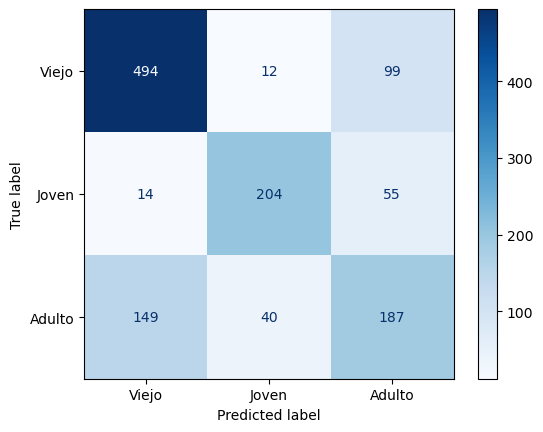

In [11]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=y.unique())

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

### Uso de cross validation